<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Deep_Pyramidal_Residual_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Pyramidal Residual Networks**

논문 링크: https://arxiv.org/abs/1610.02915

PyramidNet은 ResNet의 down sampling에서 일어나는 **급격한 width의 변화**에 초점을 맞췄다. 일반적인 ResNet 구조의 model들은 feature map size를 반으로 줄이면서 feature map channels는 2배로 늘렸다.

PyramidNet은 모든 layer에서 channel 수가 변하도록 하여 특정 layer에 집중이 되어 있던 with의 변화를 전체 layer로 분산시켰다.

먼저 기존 ResNet에 대해 다시 한번 살펴보겠다.

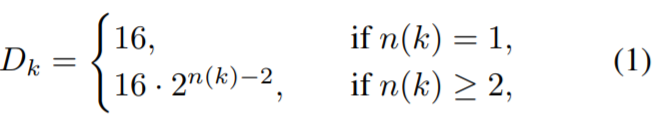

위의 식은 ResNet의 feature map의 filter 수를 나타내는 수식이다. D_k는 k번째 residual unit의 featue map의 channel(=filter 수)을 의미한다. n(k)는 k번째 residual unit이 속해있는 group이다. 해당 group은 동일한 feature map size를 갖는다.

예시를 들자면, n(k)=1은 첫번째 group을 의미한다. 여기에는 단 하나의 convolution layer만 포함이 된다. 3차원의 input image를 받아 16차원의 feature map을 생성한다. 그리고 residual unit을 거칠 때마다, feature map의 크기는 감소하고 차원 수는 2배로 증가한다.

## **PyramidNet 구조**

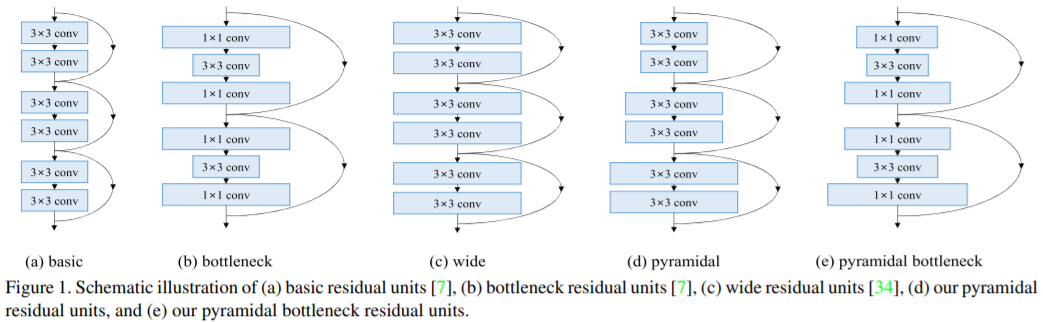

위의 그림 Figure 1에서 (a), (b)는 ResNet의 구조이며 (c), (d)는 WideResNet 구조이며 (d), (e)는 PyramidNet 구조이다.

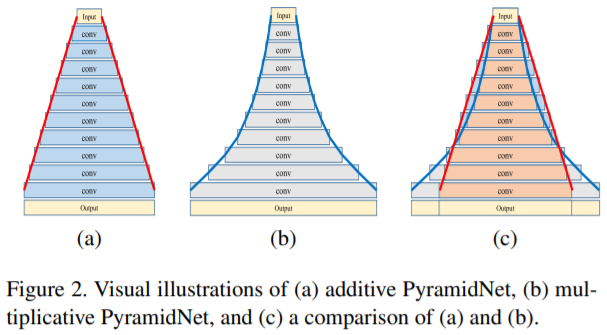

먼저 PyramidNet의 경우는 위의 그림 Figure 2의 (a)와 (b) 부분과 같이 어떻게 feature map의 channel을 증가시키냐에 따라 두 가지로 나뉜다.

### **additive PyramidNet**

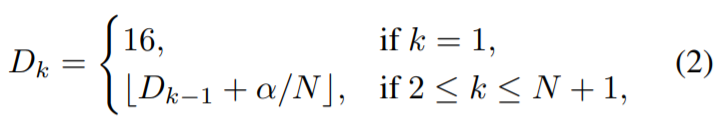

먼저 위의 그림 Figure 2에서 (a) 부분에 해당하는 additive PyramidNet은 feature map의 **channel 수가 선형적으로 증가**한다.

### **multiplicative PyramidNet**

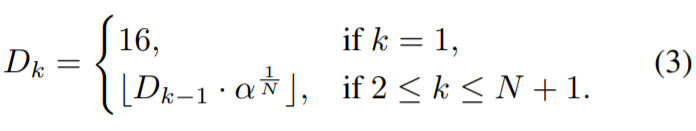

위의 그림 Figure 2에서 (b) 부분에 해당하는 multiplicative PyramidNet은 feature map의 **channel 수가 기하학적으로 증가**한다.

## **Experiments**

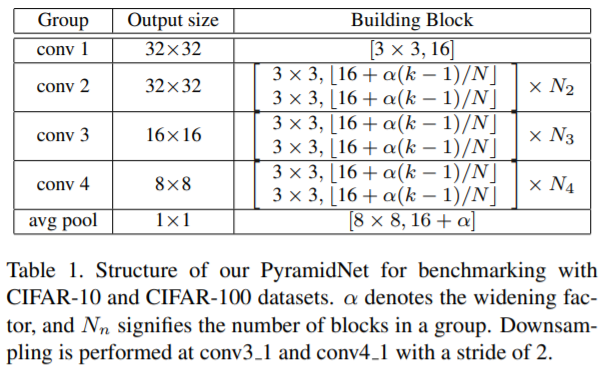

위의 표 Table 1은 CIFAR-10 및 CIFAR-100 dataset에 대한 PyramidNet의 구조이다. α는 widening factor이고, N_n은 group의 block 수를 의미한다.

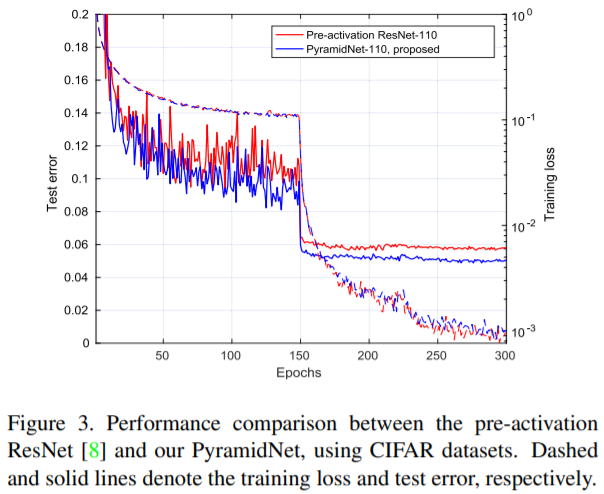

위의 그림 Figure 3은 CIFAR dataset에 대한 ResNet-110과 PyramidNet-110의 성능을 점선은 training loss, 실선은 test error로 나타낸다.

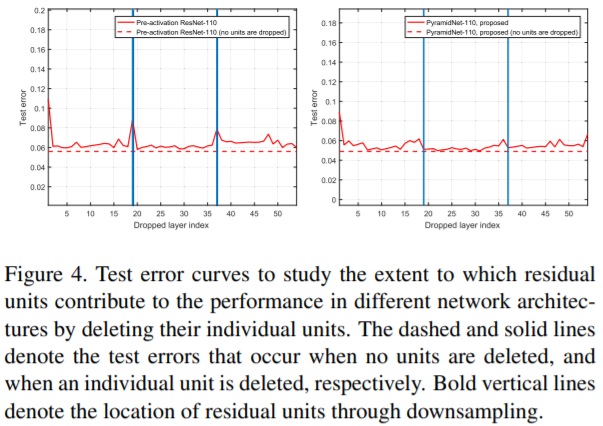

위의 그림 Figure 4를 보면 좌측에 있는 ResNet의 경우 down-samplng 시점에 성능이 급격하게 저하가 된다. 반면 우측에 있는 PyramidNet의 경우는 모든 layer에서 성능 저하가 동일하다.

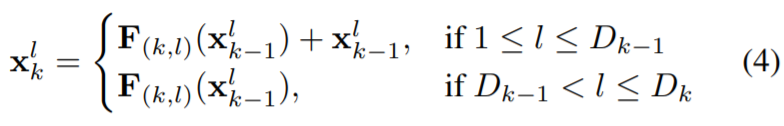

input 크기와 output 크기가 다르면 residual block을 이용할 수 없다. 따라서 둘의 크기를 맞추기 위해 **zero-padded identity-mapping shortcut**을 사용한다. 본 논문의 저자는 zero-padded identity-mapping shortcut이 residual net과 plain net을 혼합하는 효과가 있다고 추측한다.

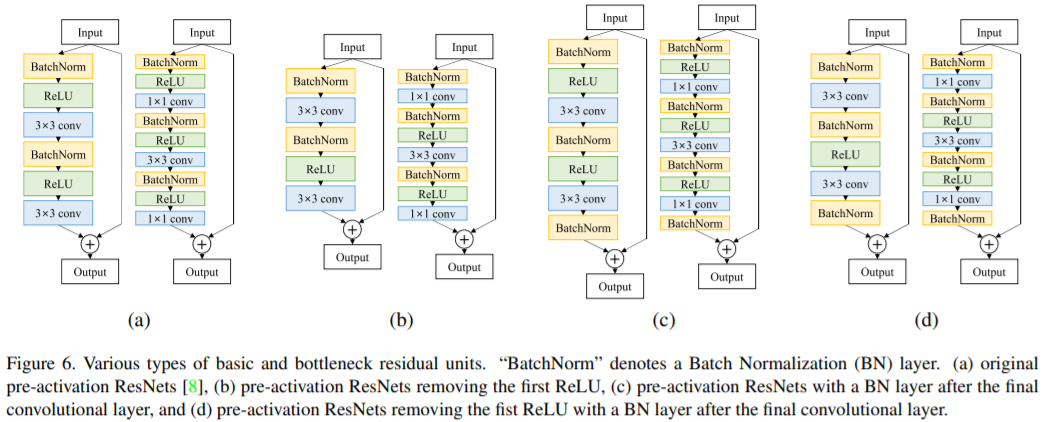

논문에서 다양한 residual block으로 실험을 진행했는데, 그 결과 residual unit에서 addition 이후 ReLU를 적용하면 성능저하가 발생한다는 것을 알았다. ReLU는 negative 값을 0으로 만들기 때문에 short connection은 항상 non-negative 값만 다음 계층으로 전달한다. 따라서 ReLU를 residual block 내로 옮겼다.

그리고 residual block에서 많은 수의 ReLU는 오히려 성능을 저하시키므로 첫번째 ReLU를 제거한다. 그리고 conv 사이에만 relu를 추가하는 것이 성능이 제일 좋았다.
또한, residual block의 마지막에 BN을 배치하면 성능이 향상된다. 

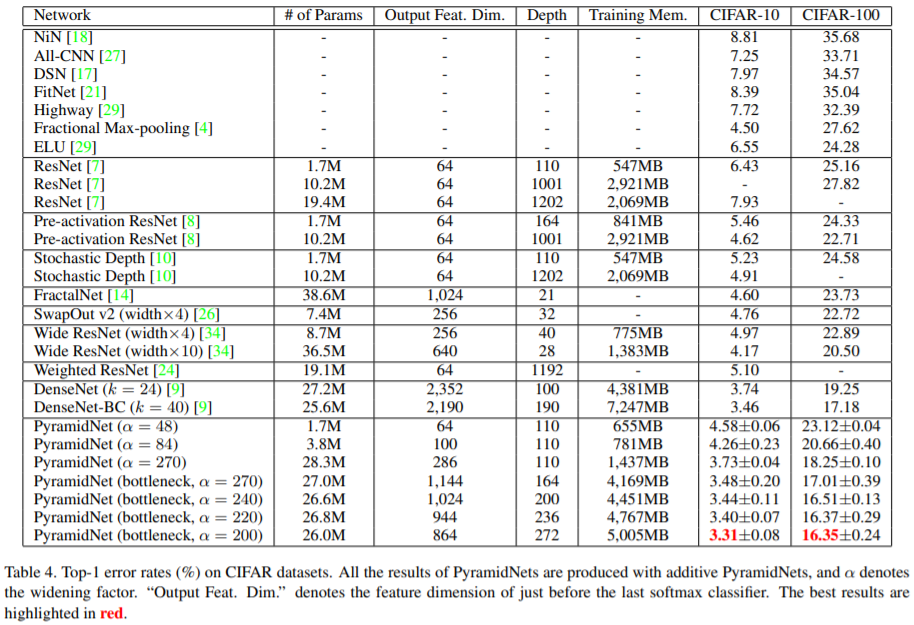

위의 표 Table 4는 CIFAR-10, CIFAR-100 dataset에 대한 PyramidNet과 다른 model들의 성능을 비교한 표이다.

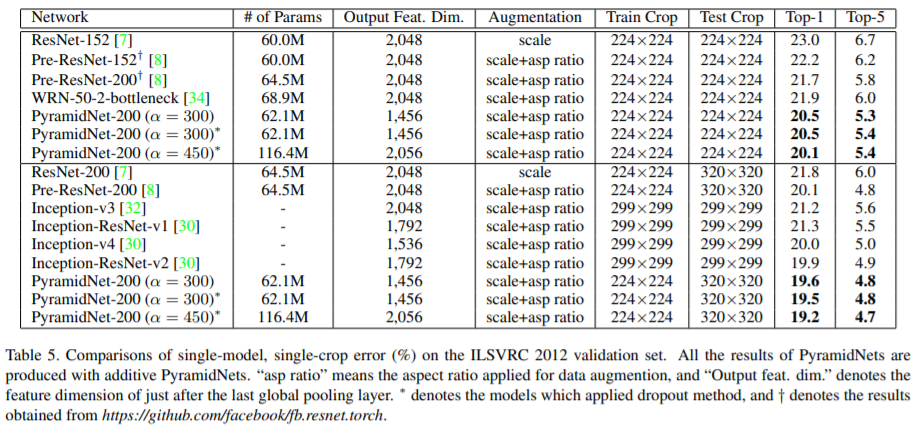

위의 표 Table 5는 ImageNet dataset에 대한 PyramidNet과 다른 model들의 성능을 비교한 표이다.